In [101]:
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import poisson 

from apprenticheshiplearning.problems.inventory import Inventory
from apprenticheshiplearning.classes.solver import SolverMdp, SolverSMD, SolverConvexHull

In [102]:
np.random.seed(1234456)

### Setting

In [103]:
max_inventory = 15
demand_lambda = 10
holding_cost = 0.5
order_cost = 3
selling_price = 15
gamma = 0.9

In [104]:
inventory = Inventory(max_inventory, demand_lambda, selling_price, holding_cost, order_cost, gamma)
inventory.get_mdp_forward()

Cost range:  -129.9812290598009 0.0


In [105]:
mini = -129.9812290598009
maxi = 0

### Forward

#### Optimal

In [106]:
solver_expert = SolverMdp(inventory.mdp_forward)
prob, mu_e = solver_expert.solve()
policy_e = inventory.mdp_forward.get_policy_from_mu(mu_e.value)

n = len(inventory.mdp_forward.S)
visualize_policy = np.zeros(n)
for i in range(n):
    visualize_policy[i] = np.argmax(policy_e[i])

print("Optimal policy:", visualize_policy)
mu_optimal = mu_e.value
mu_optimal= np.maximum(mu_optimal, 0)
mu_optimal = mu_optimal / np.sum(mu_optimal)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Nov 22 09:04:58 PM: Your problem has 256 variables, 272 constraints, and 0 parameters.
(CVXPY) Nov 22 09:04:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 22 09:04:58 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 22 09:04:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 22 09:04:58 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 22 09:04:58 PM: Compiling problem (target solver=CLARABEL

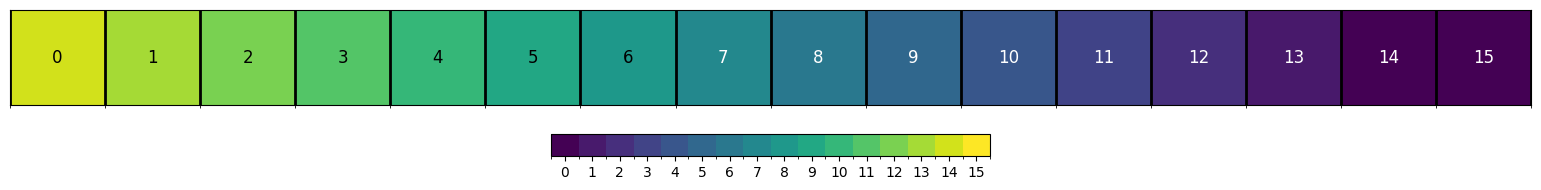

In [107]:
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

#### Suboptimal

In [108]:
max_inventory_sub = 15
demand_lambda_sub = 10
holding_cost_sub = 8
order_cost_sub = 5
selling_price_sub = 15
gamma_sub = 0.9
inventory_sub = Inventory(max_inventory_sub, demand_lambda_sub, selling_price_sub, holding_cost_sub, order_cost_sub, gamma_sub)
inventory_sub.get_mdp_forward()

Cost range:  -44.522485912870934 177.5187709401991


In [109]:
solver_expert = SolverMdp(inventory_sub.mdp_forward)
prob, mu_e = solver_expert.solve()
policy_e = inventory_sub.mdp_forward.get_policy_from_mu(mu_e.value)

n = len(inventory_sub.mdp_forward.S)
visualize_policy_sub = np.zeros(n)
for i in range(n):
    visualize_policy_sub[i] = np.argmax(policy_e[i])

print("Suboptimal policy:", visualize_policy_sub)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Nov 22 09:04:58 PM: Your problem has 256 variables, 272 constraints, and 0 parameters.
(CVXPY) Nov 22 09:04:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 22 09:04:58 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 22 09:04:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 22 09:04:58 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 22 09:04:58 PM: Compiling problem (target solver=CLARABEL

In [110]:
mu_expert = mu_e.value
mu_expert = np.maximum(mu_expert, 0)
mu_expert = mu_expert / np.sum(mu_expert)

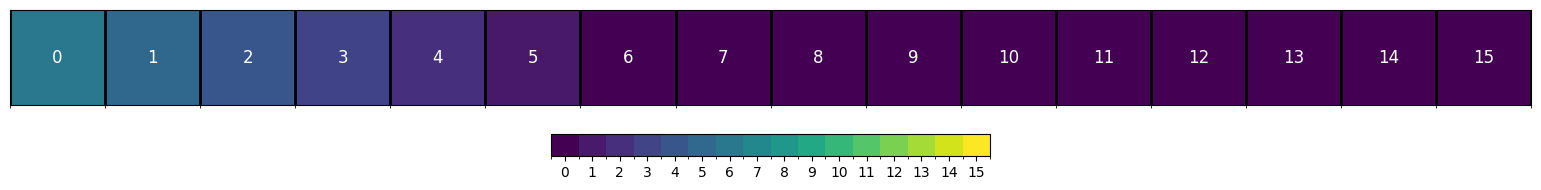

In [111]:
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy_sub.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

#### SMD

In [112]:
def cost_est(s, a, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est):
    expected_income = np.sum([sell_price_est * min(s + a, d) * poisson.pmf(d, demand_lambda_est) for d in range(max_inventory + 1)])
    ordering_cost = order_cost_est * a
    holding_cost = holding_cost_est * (s + a)
    return ordering_cost + holding_cost - expected_income

def get_c_hat(S, A, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est):
        c = np.zeros((len(S) * len(A)))
        for s in S:
            for a in A:
                c[s + len(S) * a] = cost_est(s, a, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est)
        return c

selling_price_est = 14
order_cost_est = 4
holding_cost_est = 2
c_hat = get_c_hat(inventory.mdp_forward.S, inventory.mdp_forward.A, selling_price_est, demand_lambda, order_cost_est, holding_cost_est)
c_hat = 2 * (c_hat - mini) / (maxi- mini) - 1

In [113]:
alpha = 0#0.3
mu_e = mu_optimal
c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
u_0 = np.zeros(len(inventory.mdp_forward.S))
mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
T = 10000 #10000
N = 100 #100

In [114]:
solver_smd = SolverSMD(inventory, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T) #1e-2, 1e-2
c, u, mu = solver_smd.solve_expected(N, graphics=True)

Simulation 1/100
Simulation 2/100
Simulation 3/100
Simulation 4/100
Simulation 5/100
Simulation 6/100
Simulation 7/100
Simulation 8/100
Simulation 9/100
Simulation 10/100
Simulation 11/100
Simulation 12/100
Simulation 13/100
Simulation 14/100
Simulation 15/100
Simulation 16/100
Simulation 17/100
Simulation 18/100
Simulation 19/100
Simulation 20/100
Simulation 21/100
Simulation 22/100
Simulation 23/100
Simulation 24/100
Simulation 25/100
Simulation 26/100
Simulation 27/100
Simulation 28/100
Simulation 29/100
Simulation 30/100
Simulation 31/100
Simulation 32/100
Simulation 33/100
Simulation 34/100
Simulation 35/100
Simulation 36/100
Simulation 37/100
Simulation 38/100
Simulation 39/100
Simulation 40/100
Simulation 41/100
Simulation 42/100
Simulation 43/100
Simulation 44/100
Simulation 45/100
Simulation 46/100
Simulation 47/100
Simulation 48/100
Simulation 49/100
Simulation 50/100
Simulation 51/100
Simulation 52/100
Simulation 53/100
Simulation 54/100
Simulation 55/100
Simulation 56/100
S

In [115]:
mu_e @ inventory.mdp_forward.c, mu @ inventory.mdp_forward.c, mu @ c, mu_e @ c

(np.float64(-0.5619491425492769),
 np.float64(-0.564057216387669),
 np.float64(0.026129454658842567),
 np.float64(-0.8519419890274229))

Learned policy: [14. 13. 12. 11. 14.  9. 15.  7.  6.  5.  4.  2. 15. 13.  2.  3.]


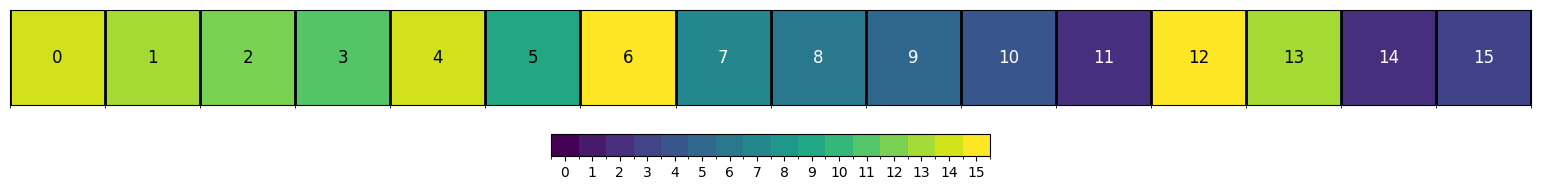

In [116]:
policy_e = inventory_sub.mdp_forward.get_policy_from_mu(mu)
n = len(inventory_sub.mdp_forward.S)
visualize_policy_smd = np.zeros(n)
for i in range(n):
    visualize_policy_smd[i] = np.argmax(policy_e[i])
print("Learned policy:", visualize_policy_smd)
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy_smd.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [117]:
def estimate_inventory_costs(mdp, cost_vector, demand_lambda, mini, maxi):
    data_points = []
    for i in range(len(cost_vector)):
        s,a = mdp.get_sa_from_index(i)
        data_points.append((s, a, ((cost_vector[i] +1) / 2) * (maxi - mini) + mini))

    def calculate_expected_sales(s, a):
        expected_sales = 0.0
        for d in range(len(mdp.S)):
            sales = min(s + a, d)
            expected_sales += sales * poisson.pmf(d, demand_lambda)
        return expected_sales
    
    N = len(data_points)

    A = np.zeros((N, 3))
    b = np.zeros(N)

    for i, (s, a, cost) in enumerate(data_points):
        # A matrix columns: [C_order (a), C_hold (s+a), C_sell (-E[sales])]
        A[i, 0] = a                     # Coefficient for order_cost
        A[i, 1] = s + a                 # Coefficient for holding_cost
        A[i, 2] = -calculate_expected_sales(s, a) # Coefficient for sell_price
        
        b[i] = cost

    x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return x.tolist()

estimated_costs = estimate_inventory_costs(inventory.mdp_forward, c, demand_lambda, mini, maxi)
print("Estimated Costs (order_cost, holding_cost, sell_price):", estimated_costs)

Estimated Costs (order_cost, holding_cost, sell_price): [-0.706999718698426, 2.0009594810964826, 10.23709362372704]


### SMD convex hull

In [118]:
v_o = np.zeros(len(inventory.mdp_forward.S)*len(inventory.mdp_forward.A))
v_h = np.zeros(len(inventory.mdp_forward.S)*len(inventory.mdp_forward.A))
v_sell = np.zeros(len(inventory.mdp_forward.S)*len(inventory.mdp_forward.A))
for s in inventory.mdp_forward.S:
    for a in inventory.mdp_forward.A:
        index = inventory.mdp_forward.get_index_from_sa(s, a)
        v_o[index] = a
        v_h[index] = s + a
        v_sell[index] = -np.sum([min(s + a, d) * poisson.pmf(d, demand_lambda) for d in range(max_inventory + 1)])
C_mat = np.zeros((len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A), 3))
C_mat[:, 0] = v_o
C_mat[:, 1] = v_h
C_mat[:, 2] = v_sell

In [119]:
parameters = np.array([(order_cost/18.5), (holding_cost/18.5), (selling_price/18.5)])
cost = 18.5 * C_mat @ parameters
cost = 2 * (cost - mini) / (maxi - mini) - 1
cost - inventory.mdp_forward.c

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.22044605e-16,
        0.00000000e+00,  0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
       -2.22044605e-16, -2.22044605e-16,  4.44089210e-16, -2.22044605e-16,
        4.44089210e-16,  0.00000000e+00, -4.44089210e-16, -4.44089210e-16,
        0.00000000e+00,  0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
        0.00000000e+00, -2.22044605e-16,  0.00000000e+00, -2.22044605e-16,
       -2.22044605e-16,  4.44089210e-16, -2.22044605e-16,  4.44089210e-16,
       -2.22044605e-16, -2.22044605e-16, -1.11022302e-16, -2.22044605e-16,
        0.00000000e+00, -2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
       -2.22044605e-16,  0.00000000e+00, -2.22044605e-16, -2.22044605e-16,
        4.44089210e-16, -2.22044605e-16,  4.44089210e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16,  0.00000000e+00,  0.00000000e+00, -2.22044605e-16,
        0.00000000e+00, -

In [120]:
mu_e = mu_optimal
w_0 = np.zeros((3))
u_0 = np.zeros(len(inventory.mdp_forward.S))
mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
T = 10000 #10000
N = 100 #100

In [121]:
solver_ch= SolverConvexHull(inventory, C_mat, mu_e, w_0, u_0, mu_0, 1e-2, 1e-2, T)
c, u, mu = solver_ch.solve_expected(N, graphics=True)

Simulation 1/100
Simulation 2/100
Simulation 3/100
Simulation 4/100
Simulation 5/100
Simulation 6/100
Simulation 7/100
Simulation 8/100
Simulation 9/100
Simulation 10/100
Simulation 11/100
Simulation 12/100
Simulation 13/100
Simulation 14/100
Simulation 15/100
Simulation 16/100
Simulation 17/100
Simulation 18/100
Simulation 19/100
Simulation 20/100
Simulation 21/100
Simulation 22/100
Simulation 23/100
Simulation 24/100
Simulation 25/100
Simulation 26/100
Simulation 27/100
Simulation 28/100
Simulation 29/100
Simulation 30/100
Simulation 31/100
Simulation 32/100
Simulation 33/100
Simulation 34/100
Simulation 35/100
Simulation 36/100
Simulation 37/100
Simulation 38/100
Simulation 39/100
Simulation 40/100
Simulation 41/100
Simulation 42/100
Simulation 43/100
Simulation 44/100
Simulation 45/100
Simulation 46/100
Simulation 47/100
Simulation 48/100
Simulation 49/100
Simulation 50/100
Simulation 51/100
Simulation 52/100
Simulation 53/100
Simulation 54/100
Simulation 55/100
Simulation 56/100
S

Learned policy: [ 9. 15. 11.  9.  6.  7. 12.  4.  2.  7.  5.  5.  0.  0.  0.  2.]


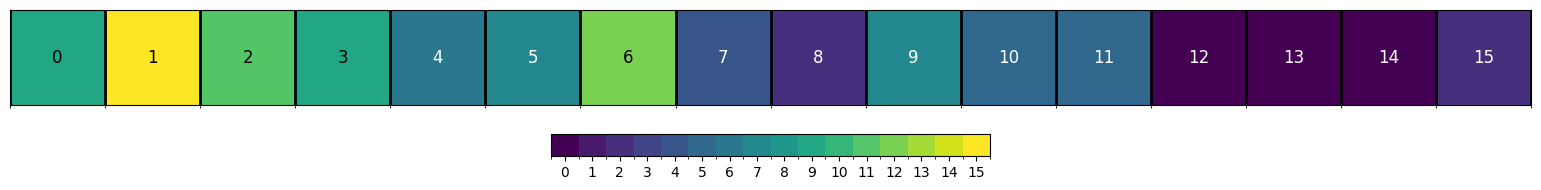

In [122]:
policy_e = inventory_sub.mdp_forward.get_policy_from_mu(mu)
n = len(inventory_sub.mdp_forward.S)
visualize_policy_smd = np.zeros(n)
for i in range(n):
    visualize_policy_smd[i] = np.argmax(policy_e[i])
print("Learned policy:", visualize_policy_smd)
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy_smd.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

### Comparison convergence speed

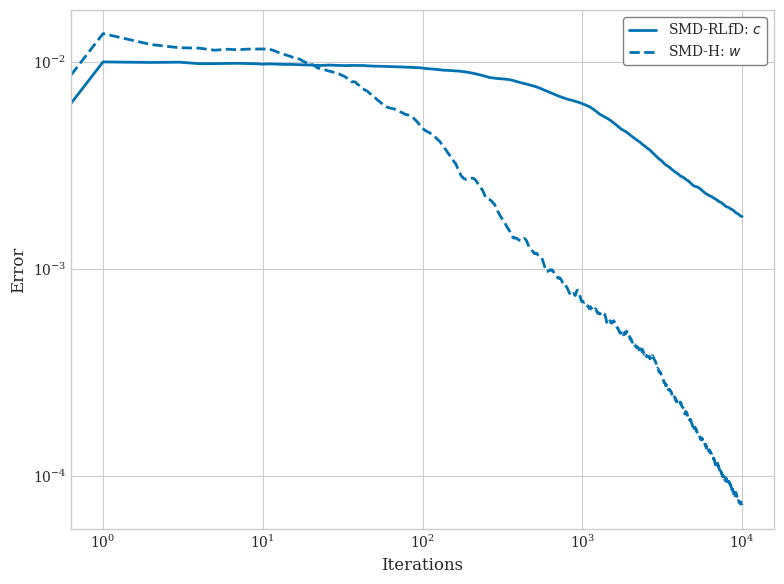

In [128]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'lines.linewidth': 2,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.frameon': True  # Ensure legend has a background in whitegrid
})

# --- 2. Define Colors ---
# 0: Blue (#0072B2), 1: Orange (#D55E00), 2: Green (#009E73)
colors = ['#0072B2', '#D55E00', '#009E73']

fig, ax = plt.subplots(figsize=(8, 6))

# --- 3. Plot Solver SMD (Solid Lines) ---
# Plot 'c' using Color 0 (Blue)
ax.plot(solver_smd.c_iter, label=r'SMD-RLfD: $c$', color=colors[0], linestyle='-')

# Plot 'u' using Color 1 (Orange)
#ax.plot(solver_smd.u_iter, label=r'SMD-RLfD: $u$', color=colors[1], linestyle='-')

# Plot 'mu' using Color 2 (Green)
#ax.plot(solver_smd.mu_iter, label=r'SMD-RLfD: $\mu$', color=colors[2], linestyle='-')

# --- 4. Plot Solver CH (Dashed Lines) ---
# Plot 'w' (equiv to c) using Color 0 (Blue)
ax.plot(solver_ch.w_iter, label=r'SMD-H: $w$', color=colors[0], linestyle='--')

# Plot 'u' using Color 1 (Orange)
#ax.plot(solver_ch.u_iter, label=r'SMD-H: $u$', color=colors[1], linestyle='--')

# Plot 'mu' using Color 2 (Green)
#ax.plot(solver_ch.mu_iter, label=r'SMD-H: $\mu$', color=colors[2], linestyle='--')

# --- 5. Labels and Formatting ---
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
#ax.set_title('Convergence Comparison: SMD vs. CH')

# Add Legend
# loc='best' allows matplotlib to place it where it overlaps the least data
ax.legend(loc='best', framealpha=1.0, edgecolor='gray')

plt.tight_layout()
plt.show()

### State size vs SMD

In [40]:
sizes = np.arange(5, 45)
time_smd = []
time_hull = []
discounted_smd = []
discounted_smd_hull = []
costs_smd = []
costs_hull = []
l1_cost_smd = []
l2_cost_smd = []
linf_cost_smd = []
l1_cost_hull = []
l2_cost_hull = []
linf_cost_hull = []
for size in sizes:
    max_inventory = size
    demand_lambda = 10
    holding_cost = 0.5
    order_cost = 3
    selling_price = 15
    gamma = 0.9
    inventory = Inventory(max_inventory, demand_lambda, selling_price, holding_cost, order_cost, gamma)
    inventory.get_mdp_forward()

    v_o = np.zeros(len(inventory.mdp_forward.S)*len(inventory.mdp_forward.A))
    v_h = np.zeros(len(inventory.mdp_forward.S)*len(inventory.mdp_forward.A))
    v_sell = np.zeros(len(inventory.mdp_forward.S)*len(inventory.mdp_forward.A))
    for s in inventory.mdp_forward.S:
        for a in inventory.mdp_forward.A:
            index = inventory.mdp_forward.get_index_from_sa(s, a)
            v_o[index] = a
            v_h[index] = s + a
            v_sell[index] = -np.sum([min(s + a, d) * poisson.pmf(d, demand_lambda) for d in range(max_inventory + 1)])
    C_mat = np.zeros((len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A), 3))
    C_mat[:, 0] = v_o
    C_mat[:, 1] = v_h
    C_mat[:, 2] = v_sell

    max_inventory_sub = size
    demand_lambda_sub = 10
    holding_cost_sub = 0.5
    order_cost_sub = 3
    selling_price_sub = 15
    gamma_sub = 0.9
    inventory_sub = Inventory(max_inventory_sub, demand_lambda_sub, selling_price_sub, holding_cost_sub, order_cost_sub, gamma_sub)
    inventory_sub.get_mdp_forward()
    mini = -129.9812290598009
    maxi = 0
    c_hat = inventory.mdp_forward.c

    solver_expert = SolverMdp(inventory_sub.mdp_forward)
    prob, mu_e = solver_expert.solve()

    mu_expert = mu_e.value
    mu_expert = np.maximum(mu_expert, 0)
    mu_expert = mu_expert / np.sum(mu_expert)

    # solve smd
    alpha = 0
    c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    u_0 = np.zeros(len(inventory.mdp_forward.S))
    mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    T = 10000
    N = 20
    solver_smd = SolverSMD(inventory, c_hat, alpha, mu_expert, c_0, u_0, mu_0, 1e-2, 1e-2, T)
    # calculate elapsed time of solve
    start_time = time.time()
    c, u, mu = solver_smd.solve_expected(N, graphics=False)
    elapsed_time = time.time() - start_time
    time_smd.append(elapsed_time)

    estimated_costs = estimate_inventory_costs(inventory.mdp_forward, c, demand_lambda, mini, maxi)
    costs_smd.append(estimated_costs)

    disc_expected_cost = mu @ inventory.mdp_forward.c
    discounted_smd.append(disc_expected_cost)

    l1_cost = np.linalg.norm(c - inventory.mdp_forward.c, 1)
    l2_cost = np.linalg.norm(c - inventory.mdp_forward.c, 2)
    linf_cost = np.linalg.norm(c - inventory.mdp_forward.c, np.inf)
    l1_cost_smd.append(l1_cost)
    l2_cost_smd.append(l2_cost)
    linf_cost_smd.append(linf_cost)

    # solve convex hull
    w_0 = np.zeros((3))
    u_0 = np.zeros(len(inventory.mdp_forward.S))
    mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    solver_ch= SolverConvexHull(inventory, C_mat, mu_expert, w_0, u_0, mu_0, 1e-2, 1e-2, T)
    start_time = time.time()
    w, u, mu = solver_ch.solve_expected(N, graphics=False)
    elapsed_time = time.time() - start_time
    time_hull.append(elapsed_time)

    costs_hull.append(w)

    disc_expected_cost_hull = mu @ inventory.mdp_forward.c
    discounted_smd_hull.append(disc_expected_cost_hull)

    l1_cost = np.linalg.norm(C_mat@w - inventory.mdp_forward.c, 1)
    l2_cost = np.linalg.norm(C_mat@w - inventory.mdp_forward.c, 2)
    linf_cost = np.linalg.norm(C_mat@w - inventory.mdp_forward.c, np.inf)
    l1_cost_hull.append(l1_cost)
    l2_cost_hull.append(l2_cost)
    linf_cost_hull.append(linf_cost)

    print(f"Size: {size}/50")

Cost range:  -1.8879032115441685 15.612096788455831
Cost range:  -1.8879032115441685 15.612096788455831
                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Nov 22 05:19:46 PM: Your problem has 36 variables, 42 constraints, and 0 parameters.
(CVXPY) Nov 22 05:19:46 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 22 05:19:46 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 22 05:19:46 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 22 05:19:46 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-----------------------------------------------

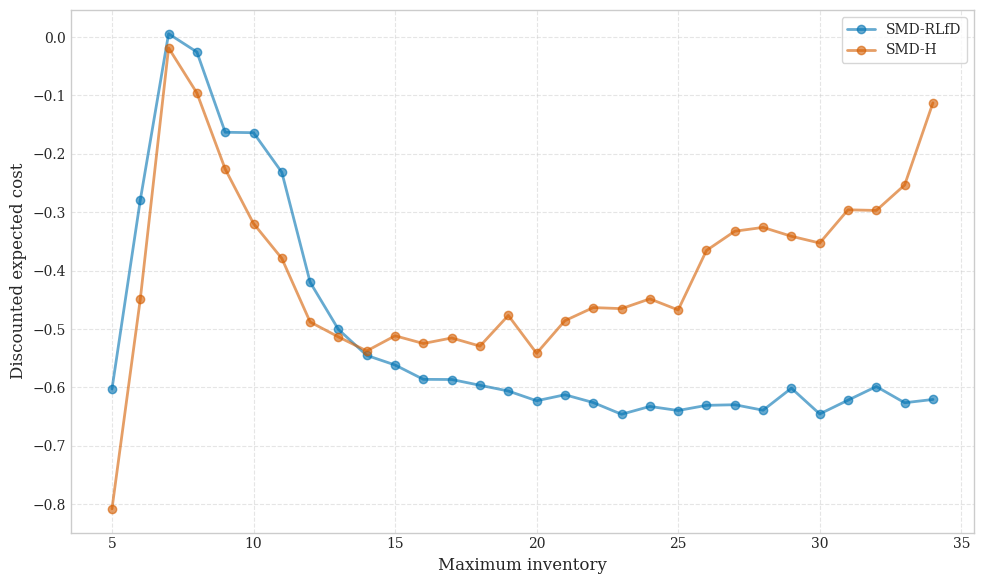

In [127]:
# plot size vs discounted expected cost both smd and hull
plt.figure(figsize=(10, 6))
# use defined colors above

plt.plot(sizes[0:30], discounted_smd[0:30], label='SMD-RLfD', color=colors[0], marker='o', alpha=0.6)
plt.plot(sizes[0:30], discounted_smd_hull[0:30], label='SMD-H', color=colors[1], marker='o', alpha=0.6)
plt.xlabel('Maximum inventory')
plt.ylabel('Discounted expected cost')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

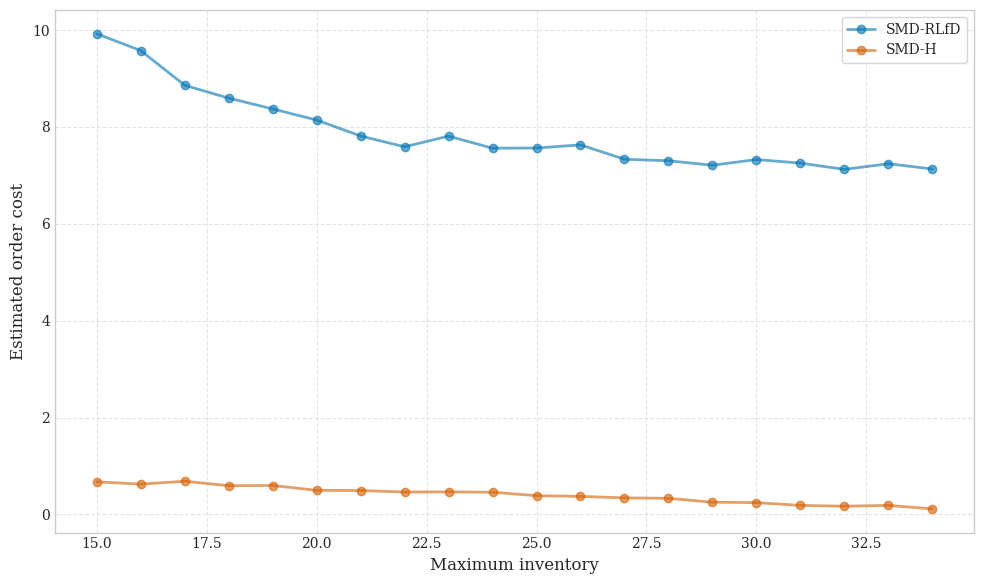

In [136]:
# plot costs_smd vs cost_hull
plt.figure(figsize=(10, 6))
plt.plot(sizes[10:30], [cost[2] for cost in costs_smd[10:30]], label='SMD-RLfD', color=colors[0], marker='o', alpha=0.6)
plt.plot(sizes[10:30], [cost[2] for cost in costs_hull[10:30]], label='SMD-H', color=colors[1], marker='o', alpha=0.6)
plt.xlabel('Maximum inventory')
plt.ylabel('Estimated order cost')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()